# Casos positivos diarios de Covid en México

Esta es la presentación final de la materia de Visualización de datos para la toma de decisiones.

El analisis que se presentará a continuación, será acerca de los casos positivos que se tuvieron durante el mes de marzo del 2020 hasta el mes de agosto del año en curso de la actual pandemia en nuestro pais.

We need `seaborn`, which shall be included it in `requirements.txt` file

# Descripción de conjunto de datos

La fuente de la que provienen estos datos se trata de DataMéxico, un sitio web en el cual puedes explorar, visualizar, comparar, y desacargar datos mexicanos, ya sea de ciudades, lugares industrias y servicio. En este caso se tiene el registro de casos confirmados de coronavirus.

Nombres de las variables:
-Year
-Querter ID
-Month ID
-Month
-Day
-Time ID
-Time
-Nation ID
-Nation
-Accum cases
-AVG 7 Days Accum Cases
-AVG 7 Days Daily Cases
-Rate Daily Cases
-Rate Accum Cases
-Days from_50 cases
-Style

Tipos de variables:
Dentro de la base de datos se encuentran variables categóricas como la nacionalidad (Nation ID y Nation), Month ID y Month. Style es una variable binaria. No hay ordinales. El resto de variables son numéricas,  de las cuales la mayoria son discretas, además hay unas pocas variables continuas.

In [1]:
import seaborn as sns; sns.set()
import pandas as pd
pd.set_option('max_columns', None)
import re
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('datasets/Casos-positivos-diarios-en-Mexico-Promedio-movil-de-7-dias.csv')
df

,Year,Quarter ID,Quarter,Month ID,Month,Day,Time ID,Time,Nation ID,Nation,Accum Cases,Daily Cases,AVG 7 Days Accum Cases,AVG 7 Days Daily Cases,Rate Daily Cases,Rate Accum Cases,Days from 50 Cases,Style
0,2020,1,Q1,3,2020-03,15,20200315,2020-03-15,mex,México,327,37,1.892857e+02,36.714287,0.028953,0.255884,10,solid
1,2020,1,Q1,3,2020-03,16,20200316,2020-03-16,mex,México,403,76,2.361429e+02,46.857143,0.059472,0.315356,11,solid
2,2020,1,Q1,3,2020-03,17,20200317,2020-03-17,mex,México,507,104,2.954286e+02,59.285713,0.081382,0.396738,12,solid
3,2020,1,Q1,3,2020-03,18,20200318,2020-03-18,mex,México,623,116,3.657143e+02,70.285713,0.090772,0.487510,13,solid
4,2020,1,Q1,3,2020-03,19,20200319,2020-03-19,mex,México,774,151,4.517143e+02,86.000000,0.118160,0.605670,14,solid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,2021,3,Q3,8,2021-08,21,20210821,2021-08-21,mex,México,3246602,5533,3.206248e+06,14391.857422,4.329682,2540.530518,534,dashed
525,2021,3,Q3,8,2021-08,22,20210822,2021-08-22,mex,México,3250802,4200,3.220372e+06,14123.286133,3.286583,2543.817139,535,dashed
526,2021,3,Q3,8,2021-08,23,20210823,2021-08-23,mex,México,3264355,13553,3.233355e+06,12983.142578,10.605492,2554.422607,536,dashed
527,2021,3,Q3,8,2021-08,24,20210824,2021-08-24,mex,México,3271079,6724,3.244537e+06,11182.571289,5.261663,2559.684326,537,dashed


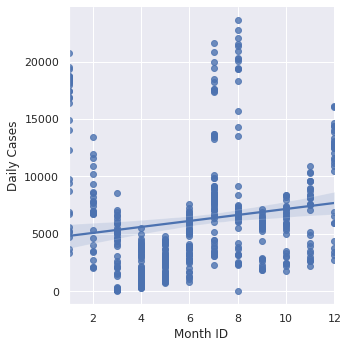

In [3]:
sns.lmplot(x= 'Month ID',
          y = 'Daily Cases',
          data = df)

plt.show()

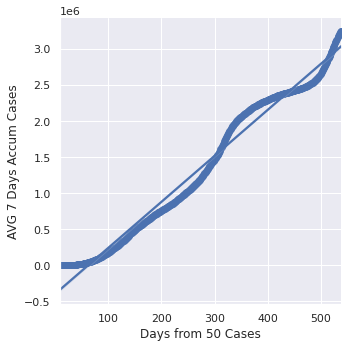

In [4]:
sns.lmplot(x= 'Days from 50 Cases',
          y = 'AVG 7 Days Accum Cases',
          data = df)

plt.show()

In [5]:
vars=['Days from 50 Cases','AVG 7 Days Accum Cases']
relacion=df[vars]

relacion[vars].corr()

,Days from 50 Cases,AVG 7 Days Accum Cases
Days from 50 Cases,1.000000,0.990389
AVG 7 Days Accum Cases,0.990389,1.000000


In [6]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
X = pd.DataFrame (df['Days from 50 Cases'])
Y = pd.DataFrame (df['AVG 7 Days Accum Cases'])

model_lm = lm.fit(X,Y)
model_lm

days_from_50_cases = pd.DataFrame([300])
predict_AVG_7_days_Accum_Cases = model_lm.predict(days_from_50_cases)
predict_AVG_7_days_Accum_Cases

array([[1517102.27743508]])

Text(0.5, 1.0, 'Casos diarios')

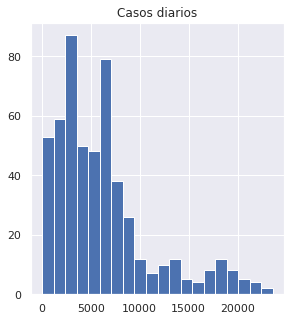

In [7]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.hist(df['Daily Cases'],bins= 20)
plt.title('Casos diarios')


NameError: name 'df_1' is not defined